# Coupon Particle Generation 

In [1]:
# Amira Abdel-Rahman
# (c) Massachusetts Institute of Technology 2020

In [1]:
using Plots
import StaticArrays: SVector
using RegionTrees
import JSON


In [2]:
include("adaptive_distance_fields.jl")
using .AdaptivelySampledDistanceFields: ASDF, evaluate

## Frep Coupon

In [3]:
function frepCoupon(X,Y)
    return min(min(min(min((min(X-(-123),(123)-X)),(min(Y-(-14.5),(14.5)-Y))),-(min((min(X-(-28.5),(28.5)-X)),(min(Y-(9.5),(100)-Y))))),-(min((min(X-(-28.5),(28.5)-X)),(min(Y-(-100),(-9.5)-Y))))),-(max(max(max(((76)*(76)-((X-(-28.5))*(X-(-28.5))+(Y-(-85.5))*(Y-(-85.5)))),((76)*(76)-((X-(28.5))*(X-(28.5))+(Y-(85.5))*(Y-(85.5))))),((76)*(76)-((X-(28.5))*(X-(28.5))+(Y-(-85.5))*(Y-(-85.5))))),((76)*(76)-((X-(-28.5))*(X-(-28.5))+(Y-(85.5))*(Y-(85.5)))))))
end
function frepCoupon(v)
    X=v[1]
    Y=v[2]/1
    return min(min(min(min((min(X-(-123),(123)-X)),(min(Y-(-14.5),(14.5)-Y))),-(min((min(X-(-28.5),(28.5)-X)),(min(Y-(9.5),(100)-Y))))),-(min((min(X-(-28.5),(28.5)-X)),(min(Y-(-100),(-9.5)-Y))))),-(max(max(max(((76)*(76)-((X-(-28.5))*(X-(-28.5))+(Y-(-85.5))*(Y-(-85.5)))),((76)*(76)-((X-(28.5))*(X-(28.5))+(Y-(85.5))*(Y-(85.5))))),((76)*(76)-((X-(28.5))*(X-(28.5))+(Y-(-85.5))*(Y-(-85.5))))),((76)*(76)-((X-(-28.5))*(X-(-28.5))+(Y-(85.5))*(Y-(85.5)))))))
end

frepCoupon (generic function with 2 methods)

In [4]:
function frepCouponBW(X,Y)
    if frepCoupon(X,Y)>0
        return 1
    else
        return 0
    end
end

frepCouponBW (generic function with 1 method)

In [5]:
function frepCouponScale(X,Y)
    scale=100.0
    return min(min(min(min((min(X-(-123/scale),(123/scale)-X)),(min(Y-(-14.5/scale),(14.5/scale)-Y))),-(min((min(X-(-28.5/scale),(28.5/scale)-X)),(min(Y-(9.5/scale),(100/scale)-Y))))),-(min((min(X-(-28.5/scale),(28.5/scale)-X)),(min(Y-(-100/scale),(-9.5/scale)-Y))))),-(max(max(max(((76/scale)*(76/scale)-((X-(-28.5/scale))*(X-(-28.5/scale))+(Y-(-85.5/scale))*(Y-(-85.5/scale)))),((76/scale)*(76/scale)-((X-(28.5/scale))*(X-(28.5/scale))+(Y-(85.5/scale))*(Y-(85.5/scale))))),((76/scale)*(76/scale)-((X-(28.5/scale))*(X-(28.5/scale))+(Y-(-85.5/scale))*(Y-(-85.5/scale))))),((76/scale)*(76/scale)-((X-(-28.5/scale))*(X-(-28.5/scale))+(Y-(85.5/scale))*(Y-(85.5/scale)))))))
end
function frepCouponBWScale(X,Y)
    if frepCouponScale(X,Y)>0
        return 1
    else
        return 0
    end
end
function frepCouponScale(v)
    X=v[1]
    Y=v[2]
    scale=100.0
    f= min(min(min(min((min(X-(-123/scale),(123/scale)-X)),(min(Y-(-14.5/scale),(14.5/scale)-Y))),-(min((min(X-(-28.5/scale),(28.5/scale)-X)),(min(Y-(9.5/scale),(100/scale)-Y))))),-(min((min(X-(-28.5/scale),(28.5/scale)-X)),(min(Y-(-100/scale),(-9.5/scale)-Y))))),-(max(max(max(((76/scale)*(76/scale)-((X-(-28.5/scale))*(X-(-28.5/scale))+(Y-(-85.5/scale))*(Y-(-85.5/scale)))),((76/scale)*(76/scale)-((X-(28.5/scale))*(X-(28.5/scale))+(Y-(85.5/scale))*(Y-(85.5/scale))))),((76/scale)*(76/scale)-((X-(28.5/scale))*(X-(28.5/scale))+(Y-(-85.5/scale))*(Y-(-85.5/scale))))),((76/scale)*(76/scale)-((X-(-28.5/scale))*(X-(-28.5/scale))+(Y-(85.5/scale))*(Y-(85.5/scale)))))))
    return min(max(f,0.0),0.1)
end

frepCouponScale (generic function with 2 methods)

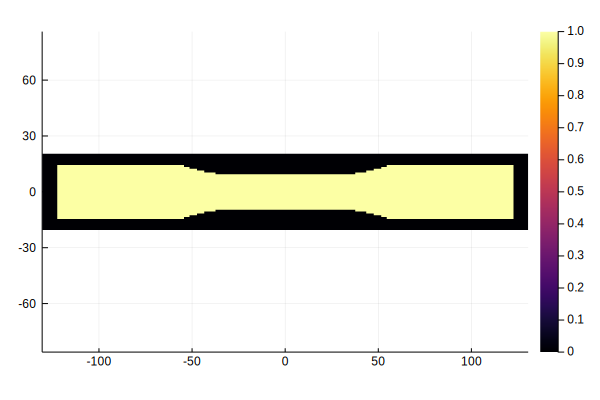

In [6]:
delta=1
x=-130:delta:130
y=-20:delta:20
ran=20
display(heatmap(x,y,frepCouponBW, aspect_ratio=:equal))
display(heatmap(x,y,frepCoupon,clim=(-ran,ran), aspect_ratio=:equal))

In [91]:
delta=1/100
x=-130/100:delta:130/100
y=-20/100:delta:20/100
ran=20/100
display(heatmap(x,y,frepCouponBWScale, aspect_ratio=:equal))
display(heatmap(x,y,frepCouponScale,clim=(-ran,ran), aspect_ratio=:equal))

In [8]:
function getSetup(fileName)
    setup = Dict()
    open(fileName, "r") do f
        dicttxt = read(f,String)  # file information to string
        setup=JSON.parse(dicttxt)  # parse and transform data
    end
    return setup
    
end


getSetup (generic function with 1 method)

In [9]:
function nodeAt(i,j,nodes)
    f=findall(x->(x[1] == i && x[2] == j),nodes)
    if length(f)>0  
        return f[1]
    else
        return -1
    end
end

nodeAt (generic function with 1 method)

In [10]:
function nodeAt(i,j,nodes,tol)
    f=findall(x->((x[1] < (i+tol ))&& (x[1] > (i-tol)) && (x[2] > (j-tol))&& (x[2] < (j+tol))),nodes)
    if length(f)>0  
        return f[1]
    else
        return -1
    end
end

nodeAt (generic function with 2 methods)

In [11]:
function edgeAt(i,j,edges)
    f=findall(x->(x[2] == i && x[1] == j),edges)
    if length(f)>0  
        return f[1]
    else
        return -1
    end
end

edgeAt (generic function with 1 method)

# Setup

In [177]:
fileName="../../json/setupSimple.json"
setup=getSetup(fileName)
setup["nodes"]=[]
setup["edges"]=[]
scale1=5e3

node= Dict()
node["id"]="n"
node["position"]= Dict()
node["position"]["x"]=0
node["position"]["y"]=0
node["position"]["z"]=0

node["force"]= Dict()
node["force"]["x"]=0
node["force"]["y"]=0
node["force"]["z"]=0

node["angle"]= Dict()
node["angle"]["x"]=0
node["angle"]["y"]=0
node["angle"]["z"]=0

node["displacement"]= Dict()
node["displacement"]["x"]=0
node["displacement"]["y"]=0
node["displacement"]["z"]=0

node["fixedDisplacement"]= Dict()
node["fixedDisplacement"]["x"]=0
node["fixedDisplacement"]["y"]=0
node["fixedDisplacement"]["z"]=0

node["restrained_degrees_of_freedom"]= [false,false,false,true,true,true];
node["material"]= Dict()
node["material"]["cTE"]= 0
node["material"]["poissonRatio"]= 0
node["material"]["density"]= 1000
node["material"]["area"]= 0.000001
node["material"]["stiffness"]= 1000000

node["nomSize"]= 1


edge= Dict()
edge["id"]="e"
edge["source"]= 0
edge["target"]=0
edge["stress"]=0

edge["material"]= Dict()
edge["material"]["cTE"]= 0
edge["material"]["poissonRatio"]= 0
edge["material"]["density"]= 1000
edge["material"]["area"]= 0.000001
edge["material"]["stiffness"]= 1000000


voxelSize=0.001
gridSize=10
setup["gridSize"]=gridSize

#scaling params
setup["voxelSize"]=voxelSize; #voxel size
setup["scale"]=1e4; #scale for visualization
setup["hierarchical"]=true; #hierachical simualtion


#simulation params
setup["numTimeSteps"]=5000; #num of saved timesteps for simulation

setup["poisson"]=false; # account for poisson ration (only for hierarchical)
setup["linear"]=false; # linear vs non-linear
setup["thermal"]=true; #if there is change in temperature
setup["globalDamping"]=0.15; # (usually from 0.1 to 0.4)


#visualization params
setup["maxNumFiles"]=100; #num of saved timesteps for visualization


######################### 2.b. Materials #########################

#default material
material1= Dict()
material1["area"]=voxelSize*voxelSize
material1["density"]=1e3
material1["stiffness"]=1e6
material1["poissonRatio"]=0.0
material1["cTE"]=0.0 #coefficient of thermal expansion

# #large bounding box for default material
# boundingBoxMaterial1=Dict()
# boundingBoxMaterial1["min"]=Dict()
# boundingBoxMaterial1["max"]=Dict()

# boundingBoxMaterial1["min"]["x"]=-voxelSize*gridSize;
# boundingBoxMaterial1["min"]["y"]=-voxelSize*gridSize;
# boundingBoxMaterial1["min"]["z"]=-voxelSize*gridSize;

# boundingBoxMaterial1["max"]["x"]= voxelSize*gridSize;
# boundingBoxMaterial1["max"]["y"]= voxelSize*gridSize;
# boundingBoxMaterial1["max"]["z"]= voxelSize*gridSize;

# #second material
# material2= Dict()
# material2["area"]=voxelSize*voxelSize
# material2["density"]=1e3
# material2["stiffness"]=1e6
# material2["poissonRatio"]=0.0
# material2["cTE"]=0.1 #coefficient of thermal expansion

# #bounding box material 2
# boundingBoxMaterial2=Dict()
# boundingBoxMaterial2["min"]=Dict()
# boundingBoxMaterial2["max"]=Dict()


# boundingBoxMaterial2["min"]["x"]=0;
# boundingBoxMaterial2["min"]["y"]=voxelSize;
# boundingBoxMaterial2["min"]["z"]=0;

# boundingBoxMaterial2["max"]["x"]= voxelSize*(latticeSizeX);
# boundingBoxMaterial2["max"]["y"]= voxelSize*(latticeSizeY);
# boundingBoxMaterial2["max"]["z"]= voxelSize*(latticeSizeZ);

setup["materials"]=[
#     [boundingBoxMaterial1,material1],
#     [boundingBoxMaterial2,material2]
];

######################### 2.c. Supports #########################

#x,y,z,rx,ry,rz (default is pinned joing i.e [false,false,false,true,true,true])
dof=[true,true,true,true,true,true]

boundingBoxSupport1=Dict()
boundingBoxSupport1["min"]=Dict()
boundingBoxSupport1["max"]=Dict()


boundingBoxSupport1["min"]["x"]= 100/scale1;
boundingBoxSupport1["min"]["y"]= -40/scale1;
boundingBoxSupport1["min"]["z"]= -1/scale1;

boundingBoxSupport1["max"]["x"]= 150/scale1;
boundingBoxSupport1["max"]["y"]= 40/scale1;
boundingBoxSupport1["max"]["z"]= 1/scale1;

setup["supports"]=[
        [boundingBoxSupport1,dof]
    ];

######################### 2.d. Loads #########################
#### 2.d.1 Static Loads
load1=Dict()
load1["x"]=0.0
load1["y"]=0.0
load1["z"]=0.0

boundingBoxLoad1=Dict()
boundingBoxLoad1["min"]=Dict()
boundingBoxLoad1["max"]=Dict()

boundingBoxLoad1["min"]["x"]=-150/scale1;
boundingBoxLoad1["min"]["y"]=-40/scale1;
boundingBoxLoad1["min"]["z"]=-1/scale1;

boundingBoxLoad1["max"]["x"]=-100/scale1;
boundingBoxLoad1["max"]["y"]=40/scale1;
boundingBoxLoad1["max"]["z"]=1/scale1;


setup["loads"]=[
        [boundingBoxLoad1,load1]
    ];

setup["fixedDisplacements"]=[];

setup["viz"]=Dict()
setup["viz"]["minStress"]= 10000000
setup["viz"]["maxStress"]= -10000000
setup["viz"]["colorMaps"]= []
setup["viz"]["colorMap"]= 0
setup["viz"]["exaggeration"]= 1

1

## Square Lattice

In [178]:
delta=5
x=-130:delta:130
y=-20:delta:20
Xs=[]
Ys=[]
edgesX=[]
edgesY=[]
for i in x
    for j in y
        if frepCouponBW(i,j)>0
            append!(Xs,i)
            append!(Ys,j)
            if frepCouponBW(i-delta,j)>0
                append!(edgesX,[[i,i-delta]])
                append!(edgesY,[[j,j]])
            end
            if frepCouponBW(i,j-delta)>0
                append!(edgesX,[[i,i]])
                append!(edgesY,[[j,j-delta]])
            end
        end
    end
end
# plot(edgesX,edgesY, aspect_ratio=:equal,label="")
# display(scatter!(Xs,Ys, aspect_ratio=:equal,label=""))
# display(plot(edgesX,edgesY, aspect_ratio=:equal,label=""))

In [179]:
delta=5
x=-130:delta:130
y=-20:delta:20
Xs=[]
Ys=[]
nodes=[]
edges=[]
edgesX=[]
edgesY=[]

count=1
for i in x
    for j in y
        if frepCouponBW(i,j)>0
            append!(Xs,i)
            append!(Ys,j)
            append!(nodes,[[i,j]])
            
            node1=deepcopy(node)
            node1["id"]="n$(count-1)"
            node1["position"]["x"]=i/scale1
            node1["position"]["y"]=j/scale1
            node1["position"]["z"]=0
            if(i<-100)
#                 node1["force"]["x"]=-0.5*0.1
#                 node1["force"]["y"]=0
#                 node1["force"]["z"]=0
                node1["fixedDisplacement"]["x"]=-voxelSize*0.001
                node1["fixedDisplacement"]["y"]=0
                node1["fixedDisplacement"]["z"]=0
            elseif(i>100)
#                 node1["force"]["x"]=0.5*0.1
#                 node1["force"]["y"]=0
#                 node1["force"]["z"]=0
                node1["fixedDisplacement"]["x"]=voxelSize*0.001
                node1["fixedDisplacement"]["y"]=0
                node1["fixedDisplacement"]["z"]=0
            end
            
            append!(setup["nodes"],[node1])
            
            
            id=nodeAt(i-delta,j,nodes)
            if id>0
                append!(edgesX,[[i,i-delta]])
                append!(edgesY,[[j,j]])
                append!(edges,[[count,id]])
                
                edge1=deepcopy(edge)
                edge1["id"]="e$(count-1)"
                edge1["source"]=(count-1)
                edge1["target"]=(id-1)
                
                append!(setup["edges"],[edge1])
            end
            id=nodeAt(i,j-delta,nodes)
            if id>0
                append!(edgesX,[[i,i]])
                append!(edgesY,[[j,j-delta]])
                append!(edges,[[count,id]])
                
                edge1=deepcopy(edge)
                edge1["id"]="e$(count-1)"
                edge1["source"]=(count-1)
                edge1["target"]=(id-1)
                
                append!(setup["edges"],[edge1])
                
            end
            count+=1
        end
    end
end
edges=reshape(vcat(edges...),2,length(edges))

plot(edgesX,edgesY, aspect_ratio=:equal,label="")
display(scatter!(Xs,Ys, aspect_ratio=:equal,label=""))
display(plot(edgesX,edgesY, aspect_ratio=:equal,label=""))



In [180]:
newSetup=Dict()
newSetup["setup"]=setup
fileName="../../json/coupon.json"
fileName
# pass data as a json string (how it shall be displayed in a file)
stringdata = JSON.json(newSetup)

# write the file with the stringdata variable information
open(fileName, "w") do f
        write(f, stringdata)
end

127170

In [181]:
p=plot(aspect_ratio=:equal,label="")
for c in 1:size(edges)[2]
    p=plot!([Xs[edges[1,c]],Xs[edges[2,c]]],[Ys[edges[1,c]],Ys[edges[2,c]]],label="")
end
p;

## Hex lattice

In [442]:
delta=5
deltaS=sqrt(delta^2-(delta/2)^2)
x=-130:delta:130
y=-20:deltaS:20
Xs=[]
Ys=[]
edgesX=[]
edgesY=[]
for i in 1:length(x)
    for j in 1:length(y)
        ii=x[i]
        jj=y[j]
        if j%(2)==0
            ii+=delta/2.0
        end
        if frepCouponBW(ii,jj)>0
            append!(Xs,ii)
            append!(Ys,jj)
            if frepCouponBW(ii-delta,jj)>0
                append!(edgesX,[[ii,ii-delta]])
                append!(edgesY,[[jj,jj]])
            end
            if frepCouponBW(ii-delta/2.0,jj-deltaS)>0
                append!(edgesX,[[ii,ii-delta/2.0]])
                append!(edgesY,[[jj,jj-deltaS]])
            end
            if frepCouponBW(ii+delta/2.0,jj-deltaS)>0
                append!(edgesX,[[ii,ii+delta/2.0]])
                append!(edgesY,[[jj,jj-deltaS]])
            end
            count+=1
        end
    end
end
# plot(edgesX,edgesY, aspect_ratio=:equal,label="")
# display(scatter!(Xs,Ys, aspect_ratio=:equal,label=""))
# display(plot(edgesX,edgesY, aspect_ratio=:equal,label=""))

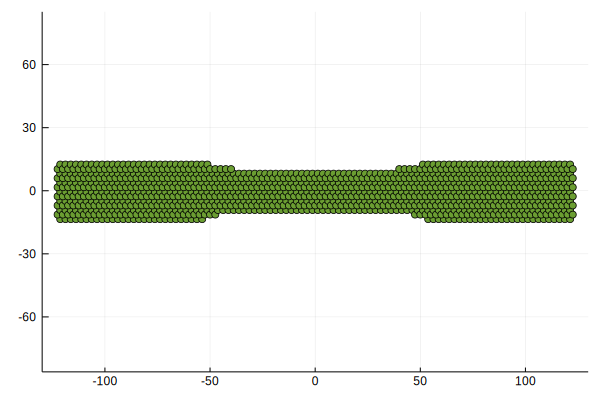

In [438]:
delta=2.5
deltaS=sqrt(delta^2-(delta/2.0)^2)
x=-130.0:delta:130.0
y=-20.0:deltaS:20.0
Xs=[]
Ys=[]

edgesX=[]
edgesY=[]

nodes=[]
edges=[]
count=1
tol=1e-5

for i in 1:length(x)
    for j in 1:length(y)
        ii=x[i]
        jj=y[j]
        if j%(2.0)==0.0
            ii=x[i]+delta/2.0
        end
        
        if frepCouponBW(ii,jj)>0
            append!(Xs,ii)
            append!(Ys,jj)
            
            append!(nodes,[[ii,jj]])
            
            node1=deepcopy(node)
            node1["id"]="n$(count-1)"
            node1["position"]["x"]=ii/scale1
            node1["position"]["y"]=jj/scale1
            node1["position"]["z"]=0
            if(ii<-100)
                node1["force"]["x"]=-0.5*0.1
                node1["force"]["y"]=0
                node1["force"]["z"]=0
            elseif(ii>100)
                node1["force"]["x"]=0.5*0.01
                node1["force"]["y"]=0
                node1["force"]["z"]=0
            end
            
            append!(setup["nodes"],[node1])
            
            
            
            id=nodeAt(ii-delta,jj,nodes,tol)
            if id>0
                append!(edgesX,[[ii,ii-delta]])
                append!(edgesY,[[jj,jj]])
                if edgeAt(id,count,edges)<0
                    append!(edges,[[count,id]])
                    edge1=deepcopy(edge)
                    edge1["id"]="e$(count-1)"
                    edge1["source"]=(count-1)
                    edge1["target"]=(id-1)

                    append!(setup["edges"],[edge1])
                end
            end
            id=nodeAt(ii- delta/2.0,jj-deltaS,nodes,tol)
            if id>0
                append!(edgesX,[[ii,ii-delta/2.0]])
                append!(edgesY,[[jj,jj-deltaS]])
                if edgeAt(id,count,edges)<0
                    append!(edges,[[count,id]])
                    edge1=deepcopy(edge)
                    edge1["id"]="e$(count-1)"
                    edge1["source"]=(count-1)
                    edge1["target"]=(id-1)

                    append!(setup["edges"],[edge1])
                end
            end
            id=nodeAt(ii+ (delta/2.0),jj-deltaS,nodes,tol)
            if id>0
                append!(edgesX,[[ii,ii+delta/2.0]])
                append!(edgesY,[[jj,jj-deltaS]])
                if edgeAt(id,count,edges)<0
                    append!(edges,[[count,id]])
                    edge1=deepcopy(edge)
                    edge1["id"]="e$(count-1)"
                    edge1["source"]=(count-1)
                    edge1["target"]=(id-1)

                    append!(setup["edges"],[edge1])
                end
            end
            
            id=nodeAt(ii- delta/2.0,jj+deltaS,nodes,tol)
            if id>0
                append!(edgesX,[[ii,ii-delta/2.0]])
                append!(edgesY,[[jj,jj+deltaS]])
                if edgeAt(id,count,edges)<0
                    append!(edges,[[count,id]])
                    edge1=deepcopy(edge)
                    edge1["id"]="e$(count-1)"
                    edge1["source"]=(count-1)
                    edge1["target"]=(id-1)

                    append!(setup["edges"],[edge1])
                end
            end
            id=nodeAt(ii+ (delta/2.0),jj+deltaS,nodes,tol)
            if id>0
                append!(edgesX,[[ii,ii+delta/2.0]])
                append!(edgesY,[[jj,jj+deltaS]])
                if edgeAt(id,count,edges)<0
                    append!(edges,[[count,id]])
                    edge1=deepcopy(edge)
                    edge1["id"]="e$(count-1)"
                    edge1["source"]=(count-1)
                    edge1["target"]=(id-1)

                    append!(setup["edges"],[edge1])
                end
            end
            
            count+=1
        end
    end
end
edges=reshape(vcat(edges...),2,length(edges))

plot(edgesX,edgesY, aspect_ratio=:equal,label="")
display(scatter!(Xs,Ys, aspect_ratio=:equal,label=""))
display(plot(edgesX,edgesY, aspect_ratio=:equal,label=""))

In [439]:
newSetup=Dict()
newSetup["setup"]=setup
fileName="../../json/couponHex.json"
fileName
# pass data as a json string (how it shall be displayed in a file)
stringdata = JSON.json(newSetup)

# write the file with the stringdata variable information
open(fileName, "w") do f
        write(f, stringdata)
end

854652

In [436]:
p=plot(aspect_ratio=:equal,label="")
for c in 1:size(edges)[2]
    p=plot!([Xs[edges[1,c]],Xs[edges[2,c]]],[Ys[edges[1,c]],Ys[edges[2,c]]],label="")
end
p

## Region Tree

In [29]:
s = x -> sqrt(sum((x - SVector(0, 0)).^2))
adf = AdaptivelySampledDistanceFields.ASDF(s, SVector(-1., -1), SVector(2., 2),1e-2,1e-2)

Cell: HyperRectangle{2,Float64}([-1.0, -1.0], [2.0, 2.0])

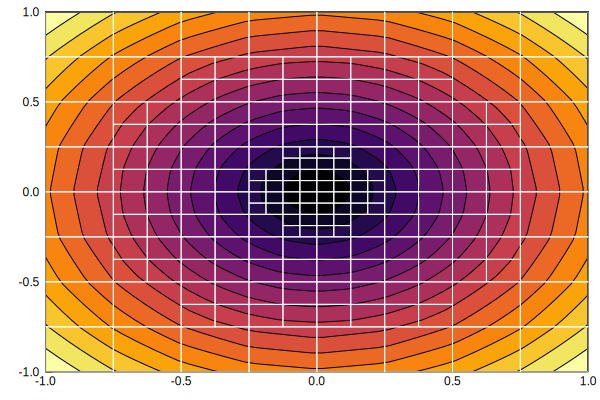

In [33]:

plt = plot(xlim=(-1, 1), ylim=(-1, 1), legend=nothing)

x = range(-1, stop=1, length=50)
y = range(-1, stop=1, length=50)
contour!(plt, x, y, (x, y) -> AdaptivelySampledDistanceFields.evaluate(adf, SVector(x, y)), fill=true)

for leaf in allleaves(adf)
    v = hcat(collect(vertices(leaf.boundary))...)
    plot!(plt, v[1,[1,2,4,3,1]], v[2,[1,2,4,3,1]], color=:white)
end


plt

In [20]:
s = x -> sqrt(sum((x - SVector(0, 0)).^2))
adf = AdaptivelySampledDistanceFields.ASDF(s, SVector(-1., -1), SVector(2., 2),1e-3,1e-3)

Cell: HyperRectangle{2,Float64}([-1.0, -1.0], [2.0, 2.0])

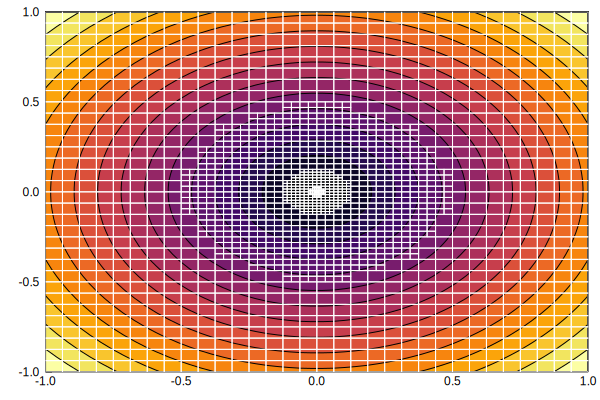

In [21]:
plt = plot(xlim=(-1, 1), ylim=(-1, 1), legend=nothing)

x = range(-1, stop=1, length=50)
y = range(-1, stop=1, length=50)
contour!(plt, x, y, (x, y) -> AdaptivelySampledDistanceFields.evaluate(adf, SVector(x, y)), fill=true)
for leaf in allleaves(adf)
    v = hcat(collect(vertices(leaf.boundary))...)
    plot!(plt, v[1,[1,2,4,3,1]], v[2,[1,2,4,3,1]], color=:white)
end


plt

## Coupon Multisize

In [182]:
rx=1.5
ry=0.2
adf = ASDF(frepCouponScale, SVector(-rx, -ry), SVector(2.0*rx, 2.0*ry),1e-2,1e-2)

Cell: HyperRectangle{2,Float64}([-1.5, -0.2], [3.0, 0.4])

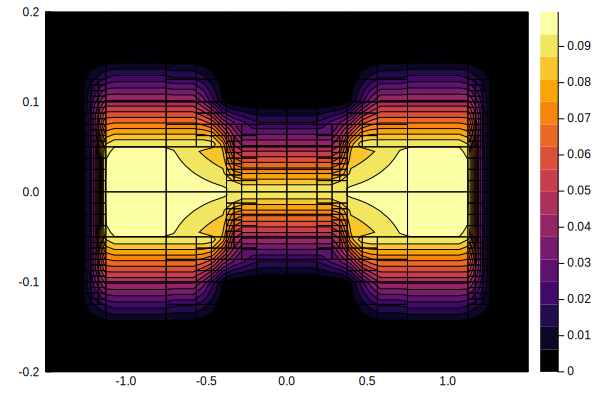

In [183]:
plt = plot(xlim=(-rx, rx), ylim=(-ry, ry))# legend=nothing)

x = range(-rx, stop=rx, length=50)
y = range(-ry, stop=ry, length=50)
contour!(plt, x, y, (x, y) -> AdaptivelySampledDistanceFields.evaluate(adf, SVector(x, y)), fill=true)

for leaf in allleaves(adf)
    v = hcat(collect(vertices(leaf.boundary))...)
    plot!(plt, v[1,[1,2,4,3,1]], v[2,[1,2,4,3,1]], color=:black,label="")
end


plt

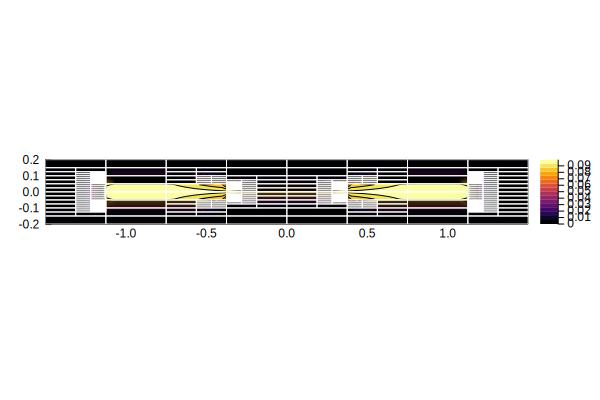

In [184]:
plt = plot(xlim=(-rx, rx), ylim=(-ry, ry), aspect_ratio=:equal)# legend=nothing)

x = range(-rx, stop=rx, length=50)
y = range(-ry, stop=ry, length=50)
contour!(plt, x, y, (x, y) -> AdaptivelySampledDistanceFields.evaluate(adf, SVector(x, y)), fill=true)

for leaf in allleaves(adf)
    v = hcat(collect(vertices(leaf.boundary))...)
    plot!(plt, v[1,[1,2,4,3,1]], v[2,[1,2,4,3,1]], color=:white,label="")
end


plt

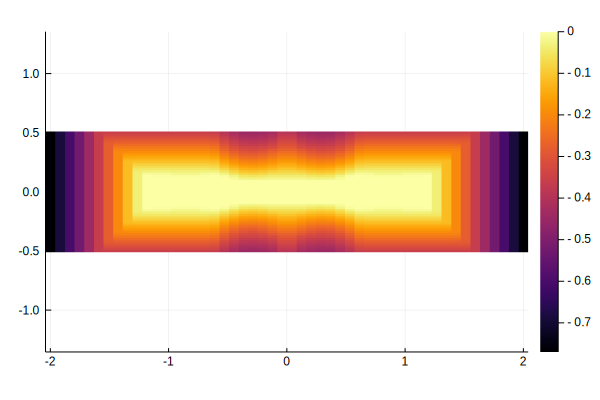

In [94]:
heatmap( x, y, (x, y) -> AdaptivelySampledDistanceFields.evaluate(adf, SVector(x, y)), aspect_ratio=:equal)


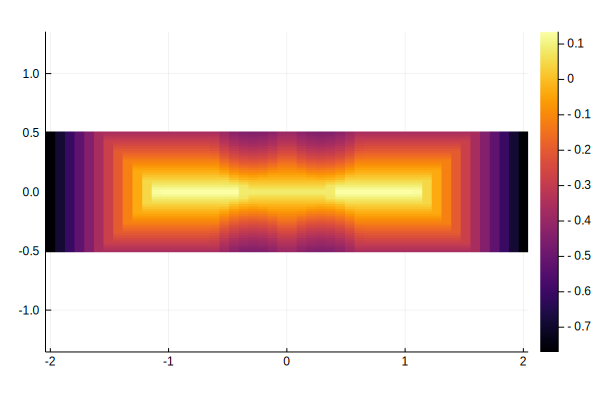

In [95]:
heatmap(x,y,frepCouponScale, aspect_ratio=:equal)

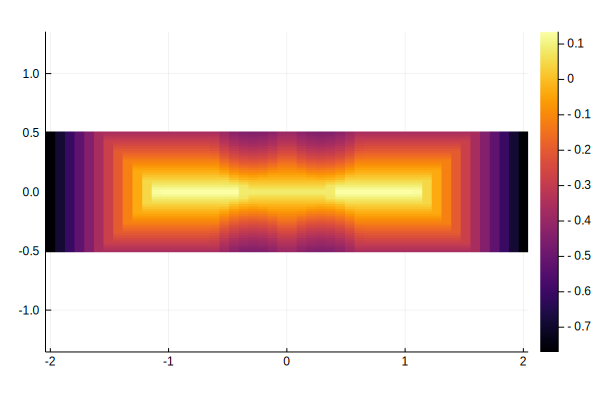

In [96]:
heatmap(x,y,frepCouponScale, aspect_ratio=:equal)

In [76]:
v=SVector(20, 1)

2-element StaticArrays.SArray{Tuple{2},Int64,1,2} with indices SOneTo(2):
 20
  1

In [77]:
v[1]

20

In [78]:
v[2]

1